In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as sts
from IPython.display import Latex
from matplotlib import gridspec
%matplotlib inline

#### Попробуем взять распределение Erlang (Erlang distribution)

Распределе́ние Эрла́нга - это разновидность Га́мма-распределе́ния. Га́мма-распределе́ние в теории вероятностей — это двухпараметрическое семейство абсолютно непрерывных распределений. Если параметр k принимает целое значение, то такое гамма-распределение также называется распределе́нием Эрла́нга.

Распределение Эрланга названо в честь А. Эрланга (A. Erlang), впервые применившего его в задачах теории массового обслуживания и телефонии.
Это распределение интенсивно применяется в задачах телекоммуникации для моделирования входящего потока вызовов.

\begin{align}
\mu \texttt{ (scale) =} \frac{1}{\lambda } \texttt{, }
\texttt{Среднее (Mean) =} \frac{k}{\lambda } \texttt{, }
\texttt{Дисперсия (Variance) =} \frac{k}{\lambda^2 } \\
\end{align}

Ссылка на статью Wiki: https://en.wikipedia.org/wiki/Erlang_distribution

In [3]:
# параметры распределения
k = 2.0
mu = 2.0
lmbd = 1 / mu

Для указанных параметров распределения рассчитаем среднее значение и дисперсию:

In [4]:
mean = k / lmbd
variance = k / math.pow(lmbd, 2)
print "Среднее = ", mean
print "Дисперсия = ", variance

Среднее =  4.0
Дисперсия =  8.0


Сгенерируем из него выборку объёма 1000

In [5]:
# зададим распределенную случайную величину
erlang_rv = sts.erlang(k, scale=mu)

# сгенерируем 1000 значений
sample = erlang_rv.rvs(size=1000)

Построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения случайной величины

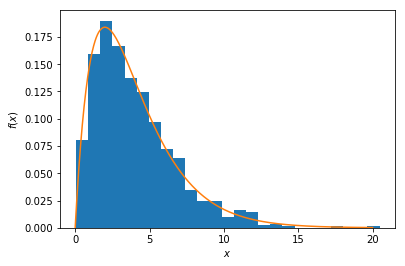

In [6]:
x = np.linspace(0,20,1000) # интервал значений для рассчета теоретической плотности вероятности
pdf = erlang_rv.pdf(x)     # вычисление значений плотности вероятности

countBins = 25
plt.hist(sample, bins=countBins, normed=True)  # рисуем гистограмму по сгенерированным случайным сначения
plt.plot(x, pdf)                        # рисуем график теоретической плотности вероятности

plt.ylabel('$f(x)$')           # задаем подпись оси y
plt.xlabel('$x$')              # задаем подпись оси x

Сгенерируем 1000 выборок по n значений и найдем для них среднее. Получим массив средневыборочных значений по выборкам размера 5, 10, 50

In [27]:
means_by_5 = [np.mean(erlang_rv.rvs(size=5)) for x in range(1000)] 
means_by_10 = [np.mean(erlang_rv.rvs(size=10)) for x in range(1000)] 
means_by_50 = [np.mean(erlang_rv.rvs(size=50)) for x in range(1000)]

### Проверка центральной предельной теоремы

Центральная предельная теорема утверждает, что сумма n независимых одинаково распределенных случайных величин имеет распределение, близкое к нормальному. Другими словами, закон распределения средней арифметической \begin{align}X_n\end{align} при увеличении n приближается к нормальному распределению
\begin{align}
N( \mu,\frac{\sigma^2 }{n})
\end{align} 


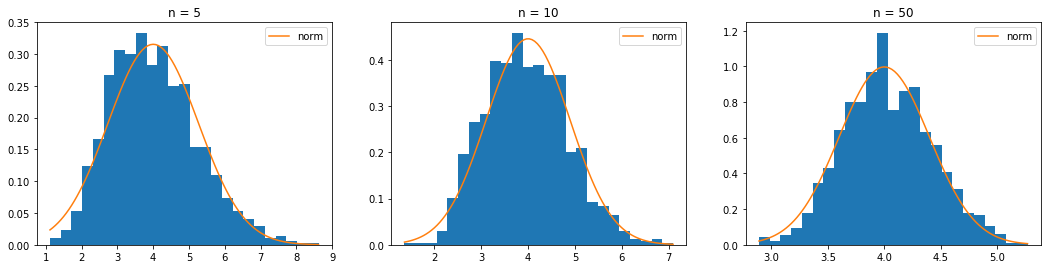

In [56]:
fig = plt.figure(figsize=(18,9))


gs = gridspec.GridSpec(2, 3)
ax1 = fig.add_subplot(gs[0])
ax1.hist(means_by_5, bins=countBins, normed=True) # рисуем гистограмму выборочных средних для n=5
ax1.set_title('n = 5', fontsize=12)

norm_x_5 = np.linspace(min(means_by_5),max(means_by_5),100)
# Рассчитаем параметры нормального распределения для интервалов по 5 используя 
# теоретические среднее (mean) и дисперсию (variance) случайной величины.
# Подставим значеия в функцию sts.norm, с учетом того что вторым параметром 
# она принимает не дисперсию, а стандартное отклонение (т.е. нужно подставить квадратный корень из значения)
norm_rv_5 = sts.norm(mean, math.sqrt(variance/5)) 
pdf = norm_rv_5.pdf(norm_x_5)
ax1.plot(norm_x_5, pdf, label='norm') # Строим график плотности вероятности нормального распределения
ax1.legend()

ax2 = fig.add_subplot(gs[1])
ax2.hist(means_by_10, bins=countBins, normed=True) # рисуем гистограмму выборочных средних для n=10
ax2.set_title('n = 10', fontsize=12)

norm_x_10 = np.linspace(min(means_by_10),max(means_by_10),100)
# Рассчитаем параметры нормального распределения для интервалов по 10 используя 
# теоретические среднее (mean) и дисперсию (variance) случайной величины.
# Подставим значеия в функцию sts.norm, с учетом того что вторым параметром 
# она принимает не дисперсию, а стандартное отклонение (т.е. нужно подставить квадратный корень из значения)
norm_rv_10 = sts.norm(mean, math.sqrt(variance/10))
pdf = norm_rv_10.pdf(norm_x_10)
ax2.plot(norm_x_10, pdf, label='norm') # Строим график плотности вероятности нормального распределения
ax2.legend()


ax3 = fig.add_subplot(gs[2])
ax3.hist(means_by_50, bins=countBins, normed=True) # рисуем гистограмму выборочных средних для n=50
ax3.set_title('n = 50', fontsize=12)

norm_x_50 = np.linspace(min(means_by_50),max(means_by_50),100)
# Рассчитаем параметры нормального распределения для интервалов по 50 используя 
# теоретические среднее (mean) и дисперсию (variance) случайной величины.
# Подставим значеия в функцию sts.norm, с учетом того что вторым параметром 
# она принимает не дисперсию, а стандартное отклонение (т.е. нужно подставить квадратный корень из значения)
norm_rv_50 = sts.norm(mean, math.sqrt(variance/50))
pdf = norm_rv_50.pdf(norm_x_50)
ax3.plot(norm_x_50, pdf, label='norm') # Строим график плотности вероятности нормального распределения
ax3.legend()

fig = plt.gcf()

## Заключение

Средневыборочное с изменением объёма выборки исследуемого распределение приближается к нормальному распределению при увеличении размера выборки.